Data Pre-Processing

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

## **Importing The Dataset**



In [2]:
data = pd.read_csv("/content/weatherAUS.csv")

## **Analyse The Data**

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,32057.000000,32186.000000,31871.000000,13492.000000,9040.000000,27704.000000,31727.000000,31081.000000,31890.000000,31225.000000,25872.000000,25875.000000,16745.000000,16415.000000,32119.000000,31450.000000
mean,13.205565,24.013211,2.631979,5.629314,7.642710,37.303783,12.029628,16.536791,70.612637,52.321633,1018.244678,1015.654860,4.316274,4.427109,17.772418,22.551237
std,5.808879,6.015886,9.356417,4.573872,3.758171,13.334088,8.983314,8.935051,17.616694,20.671632,6.590718,6.521007,2.957202,2.724176,5.354867,5.862433
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000
50%,13.900000,23.400000,0.000000,4.600000,8.750000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.700000,5.000000,5.000000,18.200000,21.900000
75%,17.800000,27.700000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.100000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32555 entries, 0 to 32554
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32555 non-null  object 
 1   Location       32555 non-null  object 
 2   MinTemp        32057 non-null  float64
 3   MaxTemp        32186 non-null  float64
 4   Rainfall       31871 non-null  float64
 5   Evaporation    13492 non-null  float64
 6   Sunshine       9040 non-null   float64
 7   WindGustDir    27700 non-null  object 
 8   WindGustSpeed  27704 non-null  float64
 9   WindDir9am     28089 non-null  object 
 10  WindDir3pm     30457 non-null  object 
 11  WindSpeed9am   31727 non-null  float64
 12  WindSpeed3pm   31081 non-null  float64
 13  Humidity9am    31890 non-null  float64
 14  Humidity3pm    31225 non-null  float64
 15  Pressure9am    25872 non-null  float64
 16  Pressure3pm    25875 non-null  float64
 17  Cloud9am       16745 non-null  float64
 18  Cloud3

## **Handling missing values**

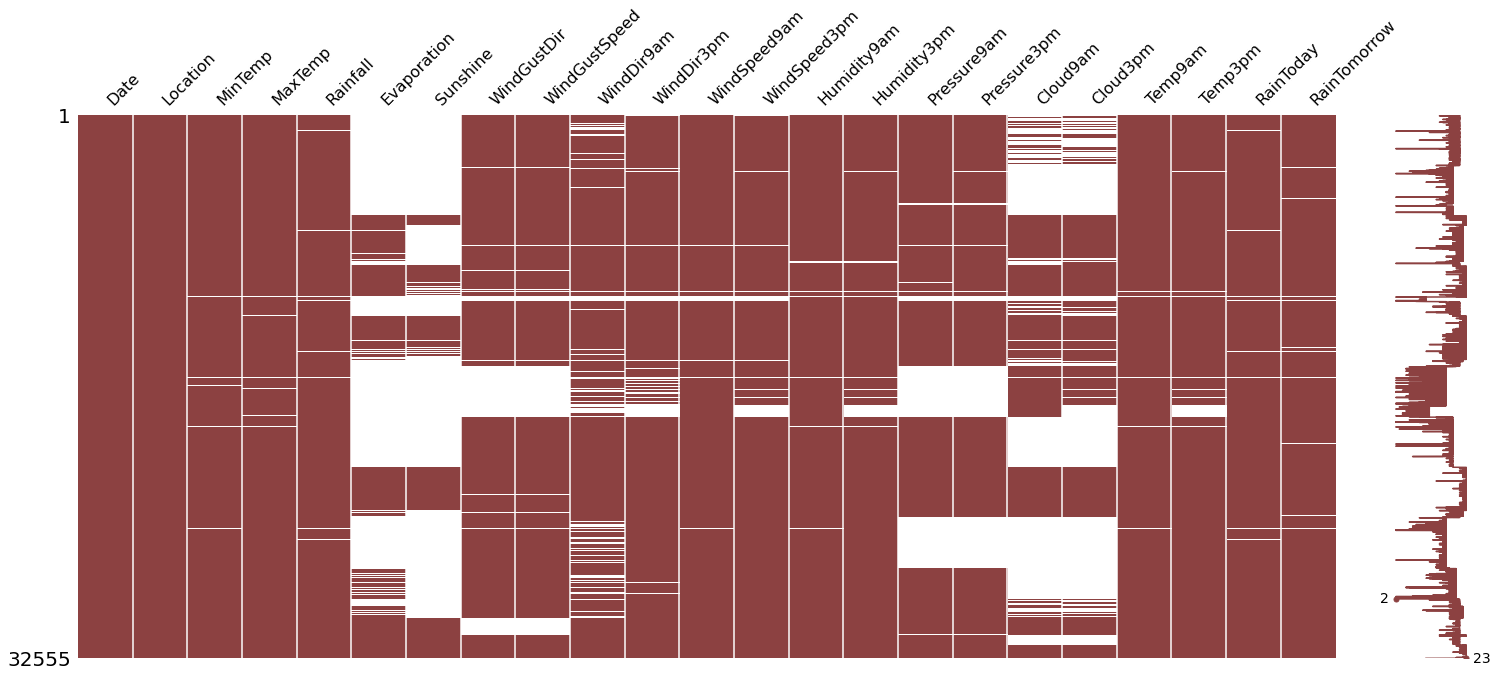

In [6]:
import missingno as msno
msno.matrix(data,color = (0.55,0.255,0.255), fontsize = 16)

removing columns with more than 20% missing values and segregatting cat and num variables

In [7]:
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

filling the missing data of numeric variables with mean

In [8]:
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True) 
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True) 
data['Humidity9am'].fillna (data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna (data['Pressure9am'].mean(), inplace=True) 
data['Pressure3pm'].fillna (data['Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(), inplace=True)

Loading the names of categorical columns

In [9]:
cat_names= data_cat.columns

intializing the simple imputer for missing categorical values

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

fitting and transforming the missing data

In [11]:
data_cat = imp_mode.fit_transform(data_cat)

converting array to dataframe

In [12]:
data_cat = pd.DataFrame(data_cat,columns=cat_names)

concatinating the categorical and numeric data

In [13]:
data = pd.concat([data,data_cat],axis=1)

## **Data Visualization**

In [14]:
data.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.653695,0.106957,0.314895,0.272496,0.220488,-0.096747,0.182573,-0.407460,-0.372754,0.890455,0.612992
MaxTemp,0.653695,1.000000,-0.090026,0.177693,0.006906,0.040071,-0.346396,-0.425530,-0.341372,-0.403157,0.822482,0.967380
Rainfall,0.106957,-0.090026,1.000000,0.130564,0.121547,0.061152,0.234219,0.257289,-0.103035,-0.066494,0.006475,-0.091933
WindGustSpeed,0.314895,0.177693,0.130564,1.000000,0.493258,0.624241,-0.236733,0.001802,-0.399532,-0.366048,0.310115,0.135207
WindSpeed9am,0.272496,0.006906,0.121547,0.493258,1.000000,0.480092,-0.312334,0.039113,-0.156192,-0.099757,0.221262,-0.004414
WindSpeed3pm,0.220488,0.040071,0.061152,0.624241,0.480092,1.000000,-0.188459,0.056042,-0.245420,-0.201828,0.220029,0.011145
Humidity9am,-0.096747,-0.346396,0.234219,-0.236733,-0.312334,-0.188459,1.000000,0.611665,0.140695,0.151372,-0.352248,-0.340232
Humidity3pm,0.182573,-0.425530,0.257289,0.001802,0.039113,0.056042,0.611665,1.000000,0.033770,0.101599,-0.063593,-0.490657
Pressure9am,-0.407460,-0.341372,-0.103035,-0.399532,-0.156192,-0.245420,0.140695,0.033770,1.000000,0.960857,-0.410585,-0.309853
Pressure3pm,-0.372754,-0.403157,-0.066494,-0.366048,-0.099757,-0.201828,0.151372,0.101599,0.960857,1.000000,-0.408761,-0.379688


In [15]:
cor = data.corr()

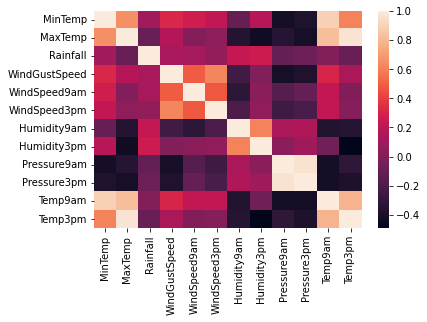

In [16]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

## **Splitting The Dateset Into Dependent And Independent Variable**

In [17]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

## **Feature Scaling**

standardizing the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [20]:
x=x.drop('Date',axis=1)

In [21]:
names = x.columns

In [22]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [23]:
sc = StandardScaler()

In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [25]:
print(len(x),len(y))

32555 32555


Label Encoding

In [26]:
LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [27]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
sc=StandardScaler()

In [29]:
x=sc.fit_transform(x)

In [30]:
x[:5]

array([[-1.57320195,  0.03373153, -0.18610579, -0.21949643,  0.5443919 ,
         0.89875889,  0.85486375,  0.02221682, -1.49776059, -1.79474533,
        -1.47155086, -0.16402523, -0.13037804, -0.5268001 ,  1.31021668,
         1.05869117,  1.50095343],
       [-1.57320195, -1.00717828,  0.18168867, -0.28430903,  0.5443919 ,
        -0.90544069,  0.62577631, -1.52634221, -1.34957326, -1.301154  ,
        -1.35114145, -0.10762158,  0.30349988, -0.5268001 ,  1.5340405 ,
        -0.51175529,  1.72656561],
       [-1.57320195, -0.05301095,  0.28199625, -0.28430903,  0.70698875,
         0.78599642,  1.0839512 , -1.87046643, -1.10259439, -1.81176572,
        -1.19632935,  0.60682465,  0.1125936 , -0.5268001 ,  1.75786431,
         1.05869117,  1.72656561],
       [-1.57320195, -0.69490534,  0.66650864, -0.28430903, -1.08157658,
        -0.11610337, -0.8632921 , -1.46898817, -1.79413524, -0.10972665,
        -0.49107423,  0.06158936,  0.68531244, -0.5268001 , -0.70419764,
         0.16129319

In [31]:
x = pd.DataFrame(x,columns=names)

## **Splitting The Data Into Train And Test**



In [32]:
from sklearn import model_selection

In [33]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, random_state =0)

## **Training And Testing The Model**

In [34]:
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
SVM = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [35]:
np.any(np.isnan(x))

False

In [36]:
XGBoost.fit(x_train,y_train)

XGBRFClassifier(objective='multi:softprob')

In [37]:
Rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
GBM.fit(x_train,y_train)

GradientBoostingClassifier()

In [41]:
log.fit(x_train,y_train)

LogisticRegression()

In [42]:
SVM.fit(x_train,y_train)

SVC()

In [43]:
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = SVM.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [44]:
print("xgboost:",metrics.accuracy_score(y_train,p1))

xgboost: 0.8245003276539974


In [45]:
print("Rand_forest:",metrics.accuracy_score(y_train,p2))

Rand_forest: 0.9995904325032765


In [46]:
print("SVM:",metrics.accuracy_score(y_train,p1))
print("Dtree:",metrics.accuracy_score(y_train,p1))
print("GBM:",metrics.accuracy_score(y_train,p1))
print("log:",metrics.accuracy_score(y_train,p1))

SVM: 0.8245003276539974
Dtree: 0.8245003276539974
GBM: 0.8245003276539974
log: 0.8245003276539974


## **Model Evaluation**

In [47]:
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = SVM.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

1. Accuracy_score

In [48]:
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
print("SVM:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM:",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.825531392062907
Rand_forest: 0.841503870254331
SVM: 0.8329033050743334
Dtree: 0.7553753532374985
GBM: 0.8419953311217594
log: 0.8254085268460499


2.Confusion Matrix

In [49]:
y_pred = log.predict(x_test)

In [50]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

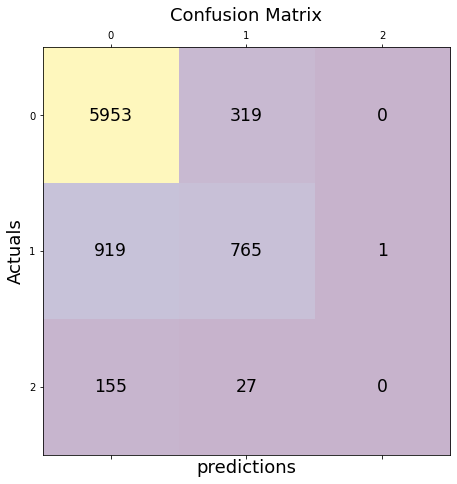

In [51]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

3. Roc-Auc Curve

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [53]:
Accuracy = accuracy_score
Precesion = precision_score
Recall = recall_score
F1_score = f1_score

In [54]:
print(conf_matrix)
print("Accuracy:",Accuracy)
print("Precesion:",Precesion)
print("Recall:",Recall)
print("F1-score",F1_score)

[[5953  319    0]
 [ 919  765    1]
 [ 155   27    0]]
Accuracy: <function accuracy_score at 0x7f22868397a0>
Precesion: <function precision_score at 0x7f2286839ef0>
Recall: <function recall_score at 0x7f2286839f80>
F1-score <function f1_score at 0x7f2286839b90>


In [55]:
from sklearn.metrics import roc_auc_score

In [57]:
auc = metrics.roc_auc_score

## **Save The Model**

In [64]:
import pickle

In [66]:
pickle.dump(Rand_forest,open('rainfall.pk1','wb'))
pickle.dump(LE,open('encoder.pk1','wb'))
pickle.dump(imp_mode,open('impter.pk1','wb'))
pickle.dump(sc,open('scale.pk1','wb'))